In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from implementations import *
from proj1_helpers import *
from preprocessing import *
from CV_modularised import *
from plots import *

# Main with split jet

As we have seen on the data exploration on the  ```main.ipynb ```, there is one categorical feature called  ```PRI_JET_NUM ``` which indicates the number of jets per sample (0, 1, 2 or 3). On this second main, we take advantage of this variable to split our dataset and fit our models on the newly split data.

#### Load the training data into feature matrix, class labels, and event ids:

In [3]:
DATA_TRAIN_PATH = '../data/train.csv'
DATA_TEST_PATH = '../data/test.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=False)
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH, sub_sample=False)
features_name = np.genfromtxt('../data/train.csv', delimiter=",", dtype=str,max_rows=1)[2:]

## Applying methods

In [4]:
seed = np.random.seed(10)

### Method 1 : least_squares_GD

#### "Parameters pre-tunage"

/Users/assiaouanaya/ml-project-1-thevipers/Scripts/implementations.py:14: RuntimeWarning: invalid value encountered in greater
  e[e>1e150] = 1e150
/Users/assiaouanaya/ml-project-1-thevipers/Scripts/implementations.py:15: RuntimeWarning: invalid value encountered in less
  e[e<-1e150] = -1e150
/Users/assiaouanaya/ml-project-1-thevipers/Scripts/implementations.py:42: RuntimeWarning: invalid value encountered in greater
  y_pred[y_pred > 700] = 700
/Users/assiaouanaya/ml-project-1-thevipers/Scripts/implementations.py:43: RuntimeWarning: invalid value encountered in less_equal
  y_pred[np.where(y_pred <= 0.5)] = 0
/Users/assiaouanaya/ml-project-1-thevipers/Scripts/implementations.py:44: RuntimeWarning: invalid value encountered in greater
  y_pred[np.where(y_pred > 0.5)] = 1


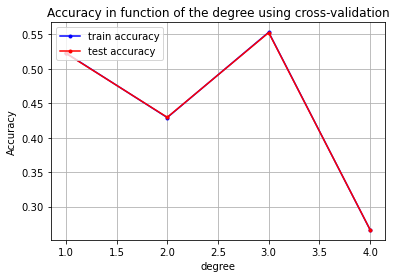

Accuracies for different degree :
[0.522724, 0.429684, 0.55272, 0.266276]


In [ ]:
#Fixed parameters :
k_fold=4
max_iters = 50

#Parameters to tune :
degrees = 1+np.arange(4)
gamma= 1e-3

best_degree, acc_te_deg, acc_tr_deg = tune_best_one(y, tX, k_fold, least_squares_GD, seed=seed, params=degrees, gamma=gamma, max_iters=max_iters, name='degree', jet=True)

CV_param_plot(degrees, acc_tr_deg, acc_te_deg, name_param="degree")

print("Accuracies for different degree :")
print(acc_te_deg)

#Parameters to tune :
degree = best_degree
gammas= np.logspace(-5, -1, 10)

best_gam, acc_te_gam, acc_tr_gam = tune_best_one(y, tX, k_fold, least_squares_GD, seed=seed, params=gammas, degree=degree, max_iters=max_iters, name='gamma', jet=True)

CV_param_plot(gammas, acc_tr_gam, acc_te_gam, name_param="gamma")

print("Accuracies for different gamma :")
print(acc_te_gam)

Using this "pre-tunage", we can apply tune simultanesouly degree and gamma on a smaller grid search (to avoid very long computation).

In [ ]:
degrees = [1, 2, 3]
gammas = np.linspace(1e-2, 5e-1, 9)

#### Parameters tunage

In [ ]:
# cross validation
deg_ls_gd, gamma_ls_gd, acc_te_ls_gd, acc_tr_ls_gd = tune_best_deg_gam(y, tX, k_fold, least_squares_GD, degrees=degrees, gammas=gammas, seed=seed, max_iters=max_iters, jet=True)
print('The degree obtaining the maximum test accuracy is : ', deg_ls_gd)
print(' ')
print('Combined with a best learning rate gamma : ', gamma_ls_gd)
print(' ')
print('And the associated maximum test accuracy is : ', acc_te_ls_gd)
print(' ')
print('While the train accuracy is : ', acc_tr_ls_gd)

### Method 2 : least_squares_SGD

#### "Parameters pre-tunage"

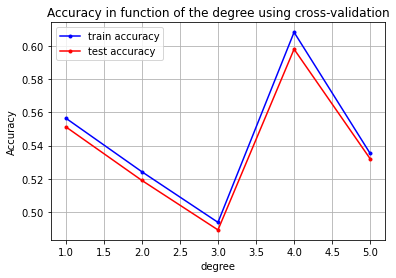

Accuracies for different degree :
[0.5512899896800826, 0.5190918472652217, 0.4893704850361197, 0.5979360165118679, 0.5320949432404541]


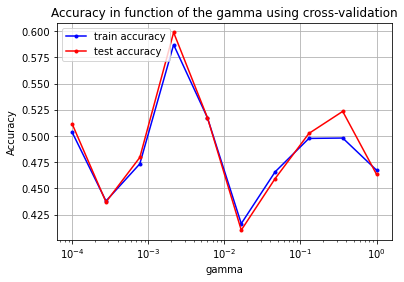

Accuracies for different gamma :
[0.5114551083591331, 0.43694530443756446, 0.4794633642930856, 0.5987616099071207, 0.5174406604747162, 0.41011351909184734, 0.4592363261093911, 0.502373581011352, 0.5234262125902993, 0.4633642930856553]


In [21]:
#Fixed parameters :
k_fold=5
max_iters = 50
batch_size = 1

#Parameters to tune :
degrees = 1+np.arange(5)
gamma=0.01

best_degree, acc_te_deg, acc_tr_deg = tune_best_one(y_, tX_, k_fold, least_squares_SGD, seed=seed, params=degrees, gamma=gamma, batch_size=batch_size, max_iters=max_iters, name='degree')

CV_param_plot(degrees, acc_tr_deg, acc_te_deg, name_param="degree")

print("Accuracies for different degree :")
print(acc_te_deg)

#Parameters to tune :
degree = best_degree
gammas=np.logspace(-4, 0, 10)

best_gam, acc_te_gam, acc_tr_gam = tune_best_one(y_, tX_, k_fold, least_squares_SGD, seed=seed, params=gammas, degree=degree, max_iters=max_iters, batch_size=batch_size, name='gamma')

CV_param_plot(gammas, acc_tr_gam, acc_te_gam, name_param="gamma")

print("Accuracies for different gamma :")
print(acc_te_gam)

Using this "pre-tunage", we can apply tune simultanesouly degree and gamma on a smaller grid search (to avoid very long computation).

In [22]:
degrees = [1, 2, 3]
gammas = np.linspace(1e-5, 1e-3, 5)

#### Parameters tunage

In [23]:
# cross validation
deg_ls_sgd, gamma_ls_sgd, acc_te_ls_sgd, acc_tr_ls_sgd = tune_best_deg_gam(y_, tX_, k_fold, least_squares_SGD, degrees=degrees, gammas=gammas, seed=seed, batch_size=batch_size, max_iters=max_iters)
print('The degree obtaining the maximum test accuracy is : ', deg_ls_sgd)
print(' ')
print('Combined with a best learning rate gamma : ', gamma_ls_sgd)
print(' ')
print('And the associated maximum test accuracy is : ', acc_te_ls_sgd)
print(' ')
print('While the train accuracy is : ', acc_tr_ls_sgd)

The degree obtaining the maximum test accuracy is :  1
 
Combined with a best learning rate gamma :  0.0007525
 
And the associated maximum test accuracy is :  0.5729618163054695
 
While the train accuracy is :  0.5760577915376677


### Method 3 : least_squares

#### Parameters tunage

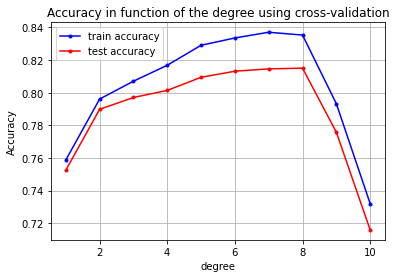

The degree obtaining the maximum test accuracy is :  8
 
And the associated maximum test accuracy is :  0.8158546655656482
 
While the train accuracy is :  0.8367740159647674


In [24]:
# parameters
degrees = 1+ np.arange(10)
k_fold = 4

#Plot
best_degree, acc_te_deg, acc_tr_deg = tune_best_one(y_, tX_, k_fold, least_squares, seed=seed, params=degrees, name='degree')
CV_param_plot(degrees, acc_tr_deg, acc_te_deg, name_param="degree")

# cross validation

deg_ls, acc_te_ls, acc_tr_ls = tune_best_deg(y_, tX_, k_fold, least_squares, degrees=degrees, seed=seed)
print('The degree obtaining the maximum test accuracy is : ', deg_ls)
print(' ')
print('And the associated maximum test accuracy is : ', acc_te_ls)
print(' ')
print('While the train accuracy is : ', acc_tr_ls)

### Method 4 : ridge_regression

#### "Parameters pre-tunage"

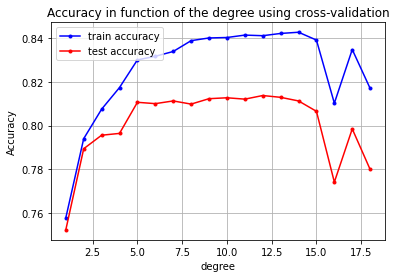

Accuracies for different degree :
[0.7522708505367466, 0.7894302229562346, 0.7956234516928159, 0.7964492155243601, 0.8106936416184971, 0.8100743187448389, 0.8113129644921552, 0.8098678777869529, 0.8123451692815855, 0.8127580511973576, 0.8121387283236994, 0.8137902559867878, 0.8129644921552437, 0.8113129644921551, 0.8065648224607762, 0.7741535920726672, 0.7985136251032205, 0.7799339388934764]


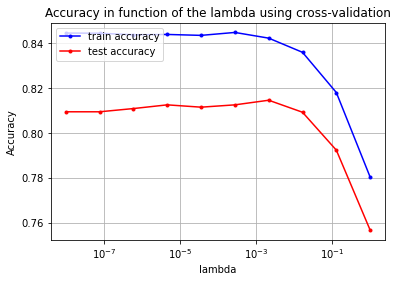

Accuracies for different lambda :
[0.8094549958711807, 0.8094549958711807, 0.8109000825763831, 0.8125516102394714, 0.8115194054500412, 0.8125516102394714, 0.8146160198183319, 0.8092485549132948, 0.7923203963666392, 0.7566061106523535]


In [25]:
# parameters
k_fold = 4

#Parameters to tune :
degrees = 1+ np.arange(18)
lambda_ = 1e-03 

best_degree, acc_te_deg, acc_tr_deg = tune_best_one(y_, tX_, k_fold, ridge_regression, seed=seed, params=degrees, lambda_=lambda_, name='degree')

CV_param_plot(degrees, acc_tr_deg, acc_te_deg, name_param="degree")

print("Accuracies for different degree :")
print(acc_te_deg)

#Parameters to tune :
degree = best_degree
lambdas = np.logspace(-8, 0, 10)

best_lam, acc_te_lam, acc_tr_lam = tune_best_one(y_, tX_, k_fold, ridge_regression, seed=seed, params=lambdas, degree=degree, name='lambda')

CV_param_plot(lambdas, acc_tr_lam, acc_te_lam, name_param="lambda")

print("Accuracies for different lambda :")
print(acc_te_lam)

Using this "pre-tunage", we can apply tune simultanesouly degree and gamma on a smaller grid search (to avoid very long computation).

In [26]:
degrees = [5, 6, 7, 8, 9, 10]
lambdas = np.logspace(-8, -3, 6)

#### Parameters tunage

In [27]:
# cross validation
deg_rr, lambda_rr, acc_te_rr, acc_tr_rr = tune_best_deg_lam(y_, tX_, k_fold, ridge_regression, degrees=degrees, lambdas=lambdas, seed=seed)

print('The degree obtaining the maximum test accuracy is : ', deg_rr)
print(' ')
print('With a lambda equal to : ', lambda_rr)
print(' ')
print('And the associated maximum test accuracy is : ', acc_te_rr)
print(' ')
print('While the train error is : ', acc_tr_rr)

The degree obtaining the maximum test accuracy is :  8
 
With a lambda equal to :  1e-05
 
And the associated maximum test accuracy is :  0.8162675474814203
 
While the train error is :  0.8392513074593999


### Method 5 : logistic_regression

#### "Parameters pre-tunage"

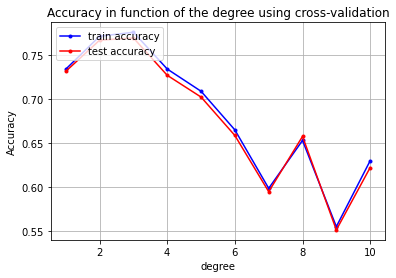

Accuracies for different degree :
[0.731833195706028, 0.7673410404624278, 0.7698183319570604, 0.7272914946325351, 0.7025185796862098, 0.6587530966143683, 0.5947563996696944, 0.6577208918249381, 0.5511973575557391, 0.6222130470685384]


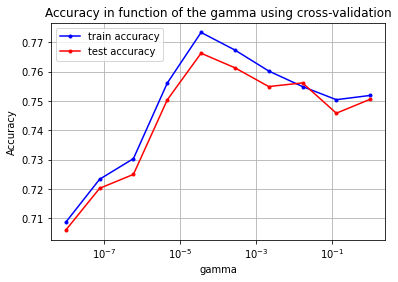

Accuracies for different gamma :
[0.7060280759702725, 0.7202725020644096, 0.7250206440957886, 0.7504128819157722, 0.7663088356729975, 0.7613542526837325, 0.754954582989265, 0.7561932287365813, 0.7458711808422791, 0.7506193228736582]


In [28]:
# parameters
k_fold = 4
max_iters = 50

#Parameters to tune :
degrees = 1+ np.arange(10)
gamma = 1e-05

best_degree, acc_te_deg, acc_tr_deg = tune_best_one(y_, tX_, k_fold, logistic_regression, seed=seed, params=degrees, gamma=gamma, max_iters=max_iters, name='degree', log=True)

CV_param_plot(degrees, acc_tr_deg, acc_te_deg, name_param="degree")

print("Accuracies for different degree :")
print(acc_te_deg)

#Parameters to tune :
degree = best_degree
gammas = np.logspace(-8, 0, 10)

best_gam, acc_te_gam, acc_tr_gam = tune_best_one(y_, tX_, k_fold, logistic_regression, seed=seed, params=gammas, degree=degree, max_iters=max_iters, name='gamma', log=True)

CV_param_plot(gammas, acc_tr_gam, acc_te_gam, name_param="gamma")

print("Accuracies for different gamma :")
print(acc_te_gam)

Using this "pre-tunage", we can apply tune simultanesouly degree and gamma on a smaller grid search (to avoid very long computation).

In [29]:
degrees = [1, 2, 3]
gammas = np.logspace(-4, -3, 5)

#### Parameters tunage

In [30]:
# cross validation
deg_lr, gam_lr, acc_te_lr, acc_tr_lr = tune_best_deg_gam(y_, tX_, k_fold, logistic_regression, degrees=degrees, gammas=gammas, max_iters=max_iters, log=True, seed=seed)

print('The degree obtaining the maximum test accuracy is : ', deg_lr)
print(' ')
print('With a learning rate equal to : ', gam_lr)
print(' ')
print('And the associated maximum test accuracy is : ', acc_te_lr)
print(' ')
print('While the train accuracy is : ', acc_tr_lr)

The degree obtaining the maximum test accuracy is :  3
 
With a learning rate equal to :  0.00031622776601683794
 
And the associated maximum test accuracy is :  0.7530966143682907
 
While the train accuracy is :  0.7506193228736582


### Method 6 : reg_logistic_regression

#### "Parameters pre-tunage"

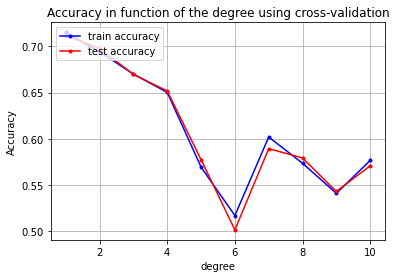

Accuracies for different degree :
[0.7118084227910817, 0.6977704376548307, 0.6696944673823286, 0.6517341040462428, 0.5772089182493807, 0.5010322047894302, 0.5891824938067713, 0.579066886870355, 0.5427332782824112, 0.5706028075970272]


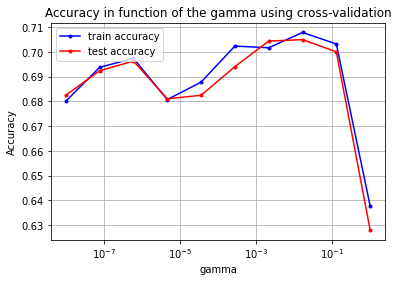

Accuracies for different gamma :
[0.6824938067712634, 0.6924029727497936, 0.6963253509496284, 0.6810487200660611, 0.6824938067712634, 0.694054500412882, 0.704376548307184, 0.7049958711808423, 0.7000412881915772, 0.6279933938893476]


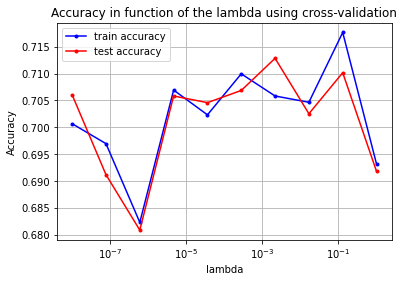

Accuracies for different lambda :
[0.7060280759702724, 0.6911643270024773, 0.680842279108175, 0.7058216350123865, 0.7045829892650702, 0.7068538398018167, 0.7128406275805119, 0.7025185796862097, 0.7101568951279934, 0.6917836498761354]


In [12]:
# parameters
k_fold = 4
max_iters=50


#Parameters to tune :
degrees=1+ np.arange(10)
gamma=0.0001
lambda_=1e-5

best_degree, acc_te_deg, acc_tr_deg = tune_best_one(y_, tX_, k_fold, reg_logistic_regression, seed=seed, params=degrees, gamma=gamma, lambda_=lambda_, max_iters=max_iters, name='degree', log=True)

CV_param_plot(degrees, acc_tr_deg, acc_te_deg, name_param="degree")

print("Accuracies for different degree :")
print(acc_te_deg)

#Parameters to tune :
degree=best_degree
gammas=np.logspace(-8, 0, 10)
lambda_=1e-5

best_gam, acc_te_gam, acc_tr_gam = tune_best_one(y_, tX_, k_fold, reg_logistic_regression, seed=seed, params=gammas, degree=degree, lambda_=lambda_, max_iters=max_iters, name='gamma', log=True)

CV_param_plot(gammas, acc_tr_gam, acc_te_gam, name_param="gamma")

print("Accuracies for different gamma :")
print(acc_te_gam)

#Parameters to tune :
degree=best_degree
gamma=best_gam
lambdas=np.logspace(-8, 0, 10)

best_lam, acc_te_lam, acc_tr_lam = tune_best_one(y_, tX_, k_fold, reg_logistic_regression, seed=seed, params=lambdas, degree=degree, gamma=gamma, max_iters=max_iters, name='lambda', log=True)

CV_param_plot(lambdas, acc_tr_lam, acc_te_lam, name_param="lambda")

print("Accuracies for different lambda :")
print(acc_te_lam)

Using this "pre-tunage", we can apply tune simultanesouly degree and gamma on a smaller grid search (to avoid very long computation).

In [13]:
degrees=[1, 2, 3]
gammas=np.logspace(-7, -1, 10)
lambdas=np.logspace(-7, -1, 10)

#### Parameters tunage

In [14]:
# cross validation
deg_lr_reg, gam_lr_reg, lambda_lr_reg, acc_te_lr_reg, acc_tr_lr_reg = tune_best_deg_lam_gam(y_, tX_, k_fold, reg_logistic_regression, degrees=degrees,
                                                                 lambdas=lambdas, gammas=gammas, log=True, seed=seed) 

print('The degree obtaining the maximum test accuracy is : ', deg_lr_reg)
print(' ')
print('With a gamma equal to : ', gam_lr_reg)
print(' ')
print('and a lambda equal to : ', lambda_lr_reg)
print(' ')
print('And the associated maximum test accuracy is : ', acc_te_lr_reg)
print(' ')
print('While the train accuracy is : ', acc_tr_lr_reg)

The degree obtaining the maximum test accuracy is :  1
 
With a gamma equal to :  0.00021544346900318823
 
and a lambda equal to :  1e-05
 
And the associated maximum test accuracy is :  0.7167630057803468
 
While the train accuracy is :  0.7091246903385631


## Compare methods

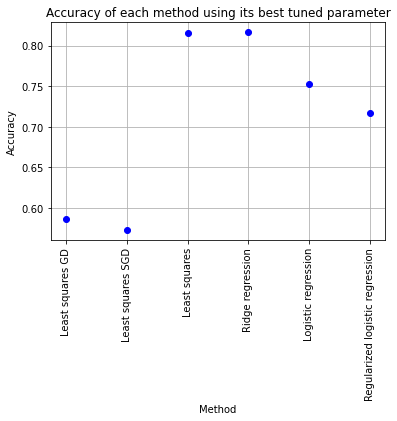

In [31]:
accuracies = [acc_te_ls_gd, acc_te_ls_sgd, acc_te_ls, acc_te_rr, acc_te_lr, acc_te_lr_reg]
methods = ['Least squares GD', 'Least squares SGD', 'Least squares', 'Ridge regression', 'Logistic regression', 'Regularized logistic regression']

compare(methods, accuracies)